In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install emoji
%pip install nltk
%pip install wordcloud
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 7.1 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
#from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline
#from transformers import MarianMTModel, MarianTokenizer
#from transformers import pipeline

import pickle

In [3]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=f807fa1e456e97b34e403fe8527548146b3bc672e120f177143186da08b7d2d8
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [4]:
from googletrans import Translator

In [6]:
df=pd.read_csv('/content/dataset(bengali).csv')

In [7]:
df.head()

,text,label
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical


In [8]:
df.tail()

,text,label
2695,যখন বাবা ফোন দেয় আর আমি বলি বাবা ফোন দিয়েছে আও...,Neutral
2696,"মাঝে মাঝে তব দেখা পাই, চিরদিন কেন পাই না।",Neutral
2697,"বন্ধু যখন বলে, কালকে গার্লফ্রেন্ড নিয়ে ডেটিং এ...",Neutral
2698,বিকল্প পথে ফেসবুক ব্যবহারকারীদের উপর কড়া নজর ...,Neutral
2699,আমি একটা কচি মাল পটিয়েছি বলে পাবলিকের হিংসা হয়।,Personal


In [9]:
#checking missing values
df.isnull().sum() #no missing values

text     0
label    0
dtype: int64

In [10]:
df['label'].value_counts()

Neutral         1166
Personal         856
Geopolitical     401
Religious        158
Political        119
Name: label, dtype: int64

In [11]:
#renaming
#cleaning and data processing

In [12]:
df=df.rename(columns={
    'label':'target',
})

In [13]:
df.head()

,text,target
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical


In [14]:
# Function to translate text using Google Translate API
def translate_text(text):
    target_language='en'
    import httpx
    timeout = httpx.Timeout(256)
    translator = Translator(timeout=timeout)
    translated_text = translator.translate(text, dest=target_language)
    print (translated_text.text)
    return translated_text.text

In [16]:
# Translate text to English (you can choose a different target language)
df['translated_text'] = df['text'].apply(translate_text)

Religious books are called extremist books.
Grandpa!The boat does not leave.Emas has given less than 3,000 cusecs of water.What is needed in the river!The tide is blowing in friendship.
The root of the fall of arrogance and arrogance, the nation has seen arrogance now wants to see the fall.
BNP Jamaat fire terror.Three BNP Jamaat arrested on fire in the capital.
The police will be attacked at home if the police are overwhelmed by the warning of the 20 -party party.
When chewing chewing gum, the stomach also becomes confused, what is chewing for 4 hours?Why not come down yet?
After coming to P, I hit the nunu on the head of anger.
Seeing the cousin from the village, the cousin is starting to steal, Abu and cousin.
Watch what Mamunul Haque said with the secret video of Anushka and Dihan.
After seeing the Bachelor's son drying two buckets of wet clothes on the roof of the house.
Watching porn is not a crime.So what will happen if you watch porn?
In Bangladesh, the bodies of the dead in Ka

In [17]:
df

,text,target,translated_text
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious,Religious books are called extremist books.
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical,Grandpa!The boat does not leave.Emas has given...
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical,The root of the fall of arrogance and arroganc...
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical,BNP Jamaat fire terror.Three BNP Jamaat arrest...
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical,The police will be attacked at home if the pol...
...,...,...,...
2695,যখন বাবা ফোন দেয় আর আমি বলি বাবা ফোন দিয়েছে আও...,Neutral,When the father gives the phone and I say the ...
2696,"মাঝে মাঝে তব দেখা পাই, চিরদিন কেন পাই না।",Neutral,Sometimes I see why I do not get forever.
2697,"বন্ধু যখন বলে, কালকে গার্লফ্রেন্ড নিয়ে ডেটিং এ...",Neutral,"When a friend says, yesterday I went to dating..."
2698,বিকল্প পথে ফেসবুক ব্যবহারকারীদের উপর কড়া নজর ...,Neutral,"Alternatively, Facebook users are being monito..."


In [18]:
df['target_encoded']=df['target'].replace({
    'Neutral':0,
    'Personal':1,
    'Geopolitical':2,
    'Religious':3,
    'Political':4,
})

In [19]:
df.head()

,text,target,translated_text,target_encoded
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious,Religious books are called extremist books.,3
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical,Grandpa!The boat does not leave.Emas has given...,2
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical,The root of the fall of arrogance and arroganc...,2
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical,BNP Jamaat fire terror.Three BNP Jamaat arrest...,2
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical,The police will be attacked at home if the pol...,2


In [20]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
# function to remove emojis

def strip_emoji(translated_text):
    return emoji.replace_emoji(translated_text,replace="")

In [23]:
# function to convert text to lowercase, remove (unwanted characters, urls, numbers, stopwords)

def strip_all_entities(translated_text):

    translated_text= translated_text.replace('\r', '').replace('\n','').lower()
    translated_text= re.sub(r"(?:\@|https?|-\://)\S+",'',translated_text)
    translated_text= re.sub(r"[^\x00-\x7f]",r'',translated_text)
    translated_text= re.sub('[0-9]+','',translated_text)

    stopchars =string.punctuation
    table=str.maketrans('','',stopchars)
    translated_text = translated_text.translate(table)

    translated_text=[word for word in translated_text.split() if word not in stop_words]
    translated_text =' '.join(translated_text)

    return translated_text

In [24]:
#function to remove contractions

def decontract(translated_text):

    translated_text=re.sub(r"cant\'t'" ,"can not", translated_text)
    translated_text = re.sub(r"n\'t", " not", translated_text)
    translated_text = re.sub(r"\'re", " are", translated_text)
    translated_text = re.sub(r"\'s", " is", translated_text)
    translated_text = re.sub(r"\'d", " would", translated_text)
    translated_text = re.sub(r"\'ll", " will", translated_text)
    translated_text = re.sub(r"\'t", " not", translated_text)
    translated_text = re.sub(r"\'ve", " have", translated_text)
    translated_text = re.sub(r"\'m", " am", translated_text)

    return translated_text

In [25]:
# funtion to clean hashtags

def clean_hashtags(tweet):
    new_tweet =" ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))

    return new_tweet2

In [26]:
# function to filter special characters

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [27]:
# removing sequences and applying stemming

def remove_mult_spaces(translated_text):
    return re.sub("\s\s+" , " ",translated_text)

def stemmer(translated_text):
    tokenized = nltk.word_tokenize(translated_text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

def lemmatize(translated_text):
    tokenized = nltk.word_tokenize(translated_text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [28]:
# using all functions

def preprocess(translated_text):
    translated_text = strip_emoji(translated_text)
    translated_text = strip_all_entities(translated_text)
    translated_text = decontract(translated_text)
    translated_text = clean_hashtags(translated_text)
    translated_text = filter_chars(translated_text)
    translated_text = remove_mult_spaces(translated_text)
    translated_text = stemmer(translated_text)
    translated_text = lemmatize(translated_text)

    return translated_text

In [29]:
df['cleaned_text'] = df['translated_text'].apply(preprocess)
df.head()

,text,target,translated_text,target_encoded,cleaned_text
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious,Religious books are called extremist books.,3,religi book call extremist book
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical,Grandpa!The boat does not leave.Emas has given...,2,grandpath boat leaveema given le cusec waterwh...
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical,The root of the fall of arrogance and arroganc...,2,root fall arrog arrog nation seen arrog want s...
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical,BNP Jamaat fire terror.Three BNP Jamaat arrest...,2,bnp jamaat fire terrorthre bnp jamaat arrest f...
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical,The police will be attacked at home if the pol...,2,polic attack home polic overwhelm warn parti p...


In [30]:
# dealing with duplicates

df['cleaned_text'].duplicated().sum()

44

In [31]:
df.drop_duplicates('cleaned_text' ,inplace=True)

In [32]:
#tokenization

df['tweet_list']=df['cleaned_text'].apply(word_tokenize)

df.head()

,text,target,translated_text,target_encoded,cleaned_text,tweet_list
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious,Religious books are called extremist books.,3,religi book call extremist book,"[religi, book, call, extremist, book]"
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical,Grandpa!The boat does not leave.Emas has given...,2,grandpath boat leaveema given le cusec waterwh...,"[grandpath, boat, leaveema, given, le, cusec, ..."
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical,The root of the fall of arrogance and arroganc...,2,root fall arrog arrog nation seen arrog want s...,"[root, fall, arrog, arrog, nation, seen, arrog..."
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical,BNP Jamaat fire terror.Three BNP Jamaat arrest...,2,bnp jamaat fire terrorthre bnp jamaat arrest f...,"[bnp, jamaat, fire, terrorthre, bnp, jamaat, a..."
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical,The police will be attacked at home if the pol...,2,polic attack home polic overwhelm warn parti p...,"[polic, attack, home, polic, overwhelm, warn, ..."


In [33]:
#EDA
#checking length of various tweet text

text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)

df['text_len'] = text_len

In [34]:
# removing text without words

df = df[df['text_len']!=0]

In [35]:
df.shape

(2656, 7)

In [36]:
# function to create a word cloud

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()

    wordcloud = WordCloud(background_color = 'white',max_words=2000, max_font_size=256,random_state=42).generate(string)


#plot the wordcloud image

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [37]:
#splitting data based on target for EDA

Neutral_type = df[df['target']=='Neutral']
Personal_type = df[df['target']=='Personal']
Geopolitical_type = df[df['target']=='Geopolitical']
Religious_type = df[df['target']=='Religious']
Political_type = df[df['target']=='Political']

In [38]:
Neutral = Counter([item for sublist in Neutral_type['tweet_list'] for item in sublist])
top25_Neutral = pd.DataFrame(Neutral.most_common(25))
top25_Neutral.columns = ['Top Words','Count']
top25_Neutral.style.background_gradient(cmap='Greens')

,Top Words,Count
0,girl,122
1,friend,93
2,say,87
3,see,80
4,go,73
5,get,65
6,boy,64
7,day,63
8,love,62
9,come,60


Text(0.5, 1.0, 'Top 25 words in Neutral Cyberbullying in Bengali')

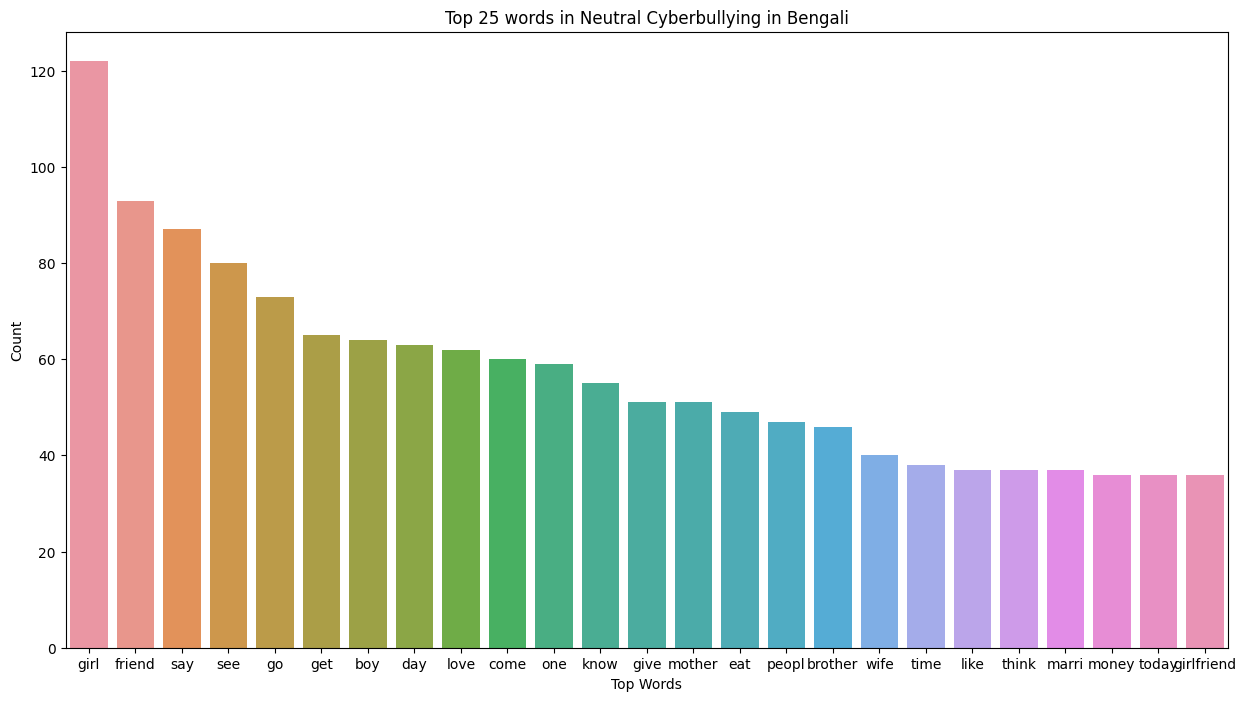

In [39]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_Neutral, y="Count", x="Top Words")
plt.title("Top 25 words in Neutral Cyberbullying in Bengali")

In [40]:
Personal = Counter([item for sublist in Personal_type['tweet_list'] for item in sublist])
top25_Personal = pd.DataFrame(Personal.most_common(25))
top25_Personal.columns = ['Top Words','Count']
top25_Personal.style.background_gradient(cmap='Greens')

,Top Words,Count
0,girl,43
1,dihan,40
2,mother,36
3,see,35
4,anushka,34
5,want,33
6,go,32
7,say,32
8,father,32
9,get,29


Text(0.5, 1.0, 'Top 25 words in Personal Cyberbullying in Bengali')

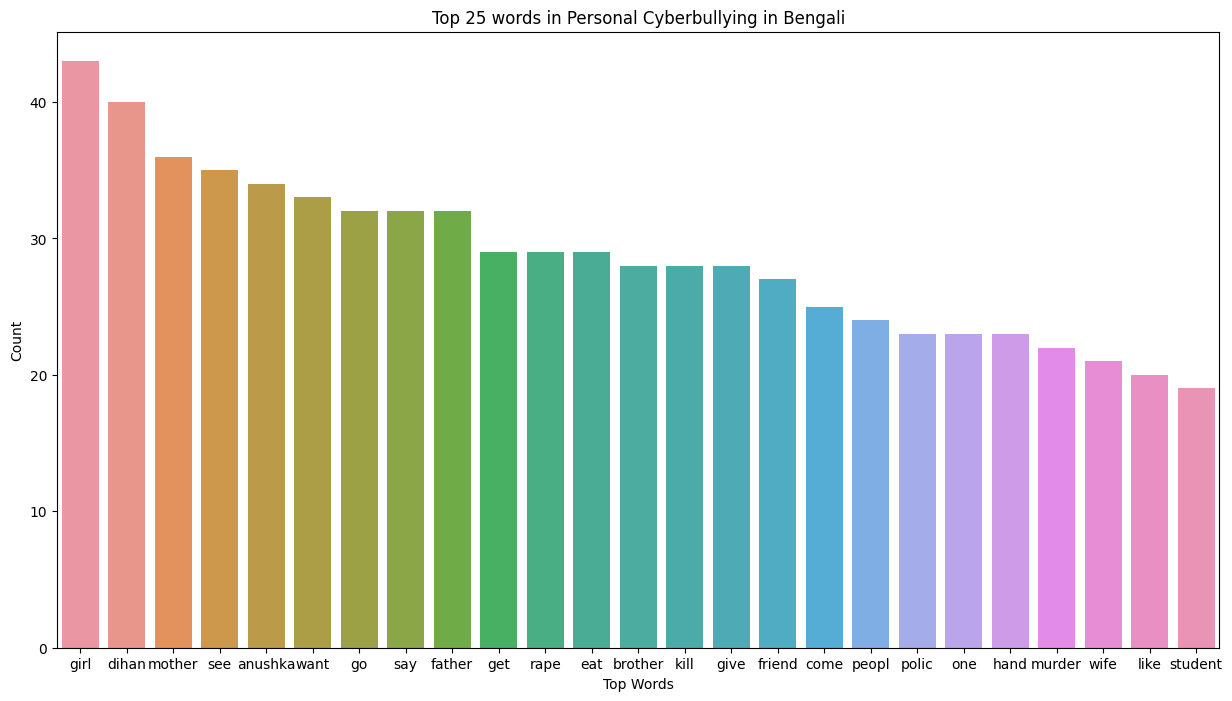

In [41]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_Personal, y="Count", x="Top Words")
plt.title("Top 25 words in Personal Cyberbullying in Bengali")

In [42]:
Geopolitical = Counter([item for sublist in Geopolitical_type['tweet_list'] for item in sublist])
top25_Geopolitical = pd.DataFrame(Geopolitical.most_common(25))
top25_Geopolitical.columns = ['Top Words','Count']
top25_Geopolitical.style.background_gradient(cmap='Greens')

,Top Words,Count
0,india,65
1,leagu,62
2,bangladesh,61
3,awami,55
4,pakistan,30
5,countri,29
6,peopl,25
7,want,24
8,kill,23
9,hasina,23


Text(0.5, 1.0, 'Top 25 words in Geopolitical Cyberbullying in Bengali')

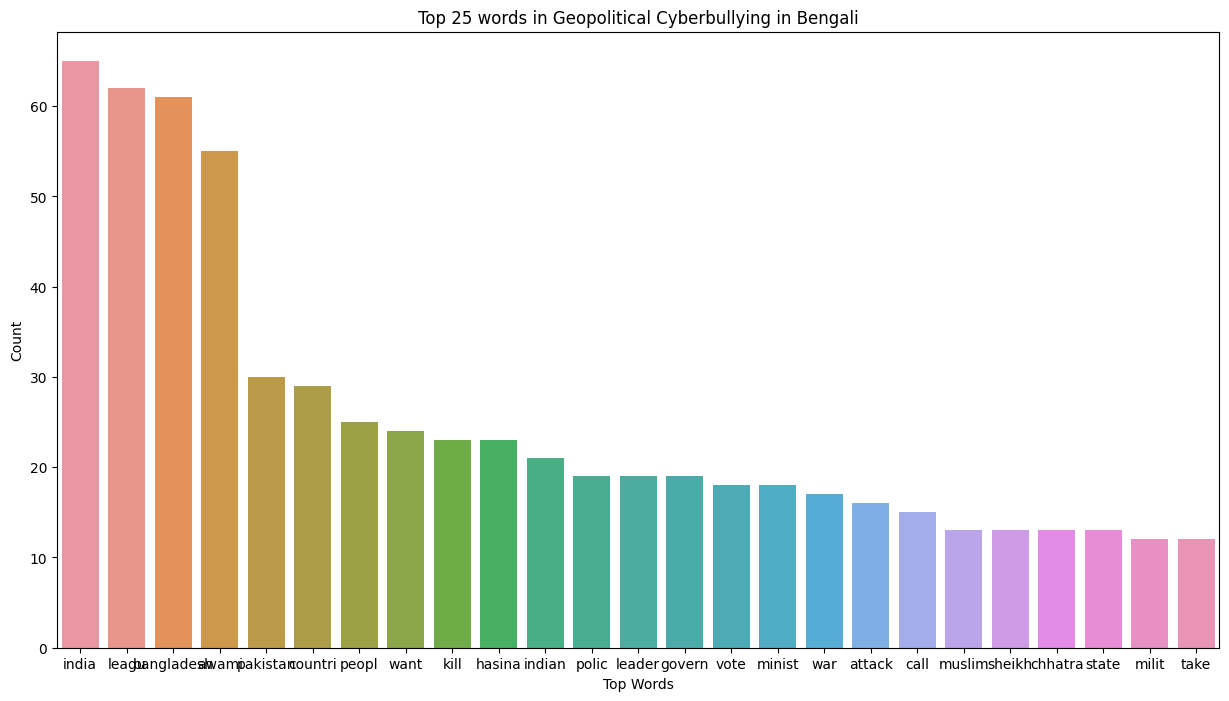

In [43]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_Geopolitical, y="Count", x="Top Words")
plt.title("Top 25 words in Geopolitical Cyberbullying in Bengali")

In [44]:
Religious = Counter([item for sublist in Religious_type['tweet_list'] for item in sublist])
top25_Religious = pd.DataFrame(Religious.most_common(25))
top25_Religious.columns = ['Top Words','Count']
top25_Religious.style.background_gradient(cmap='Greens')

,Top Words,Count
0,muslim,23
1,islam,19
2,hindu,19
3,atheist,19
4,religion,16
5,say,11
6,mosqu,11
7,india,9
8,kill,8
9,milit,7


Text(0.5, 1.0, 'Top 25 words in Religious Cyberbullying in Bengali')

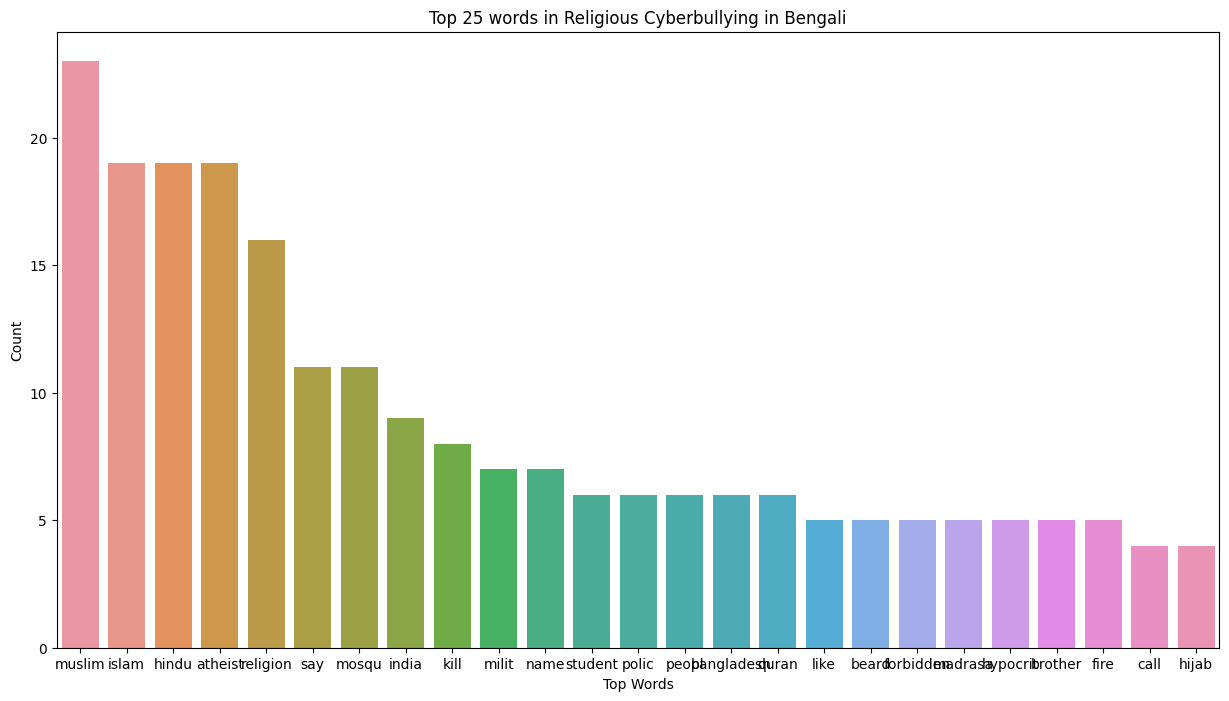

In [45]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_Religious, y="Count", x="Top Words")
plt.title("Top 25 words in Religious Cyberbullying in Bengali")

In [46]:
Political = Counter([item for sublist in Political_type['tweet_list'] for item in sublist])
top25_Political = pd.DataFrame(Political.most_common(25))
top25_Political.columns = ['Top Words','Count']
top25_Political.style.background_gradient(cmap='Greens')

,Top Words,Count
0,leagu,21
1,countri,16
2,awami,13
3,hasina,11
4,razakar,11
5,chhatra,11
6,leader,10
7,sheikh,10
8,minist,10
9,govern,10


Text(0.5, 1.0, 'Top 25 words in Political Cyberbullying in Bengali')

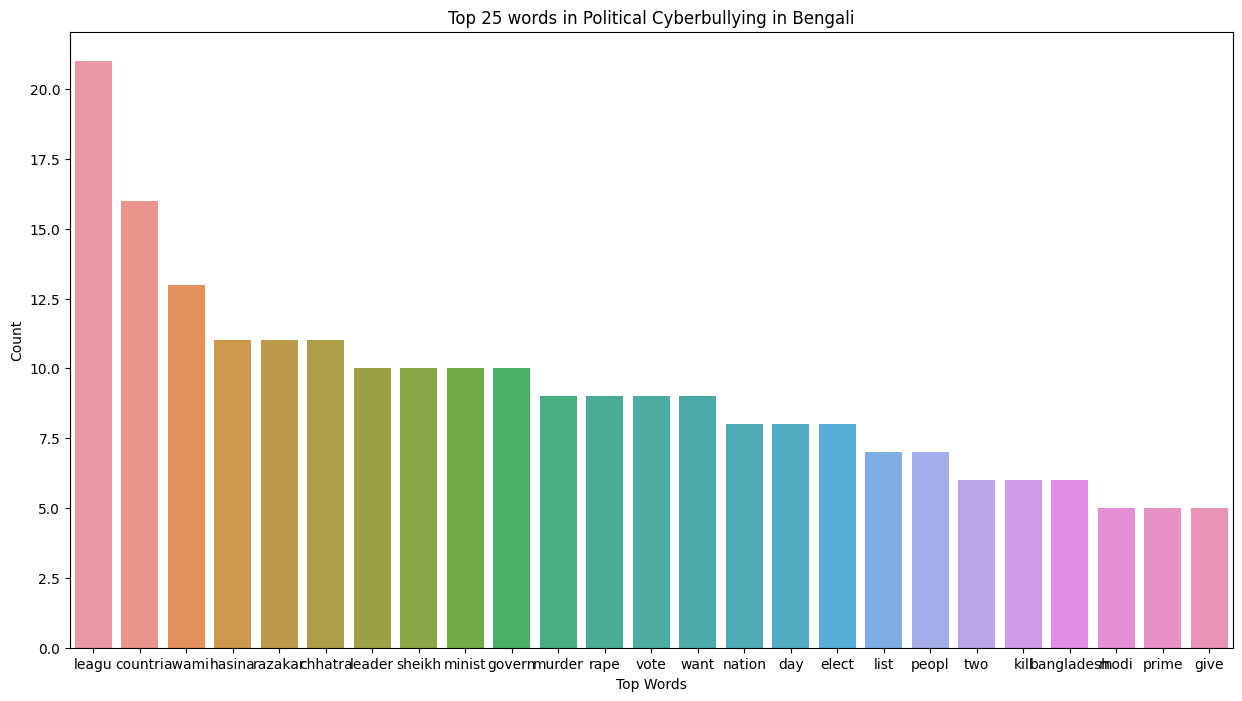

In [47]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_Political, y="Count", x="Top Words")
plt.title("Top 25 words in Political Cyberbullying in Bengali")

In [48]:
df.head()

,text,target,translated_text,target_encoded,cleaned_text,tweet_list,text_len
0,ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই।,Religious,Religious books are called extremist books.,3,religi book call extremist book,"[religi, book, call, extremist, book]",5
1,দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...,Geopolitical,Grandpa!The boat does not leave.Emas has given...,2,grandpath boat leaveema given le cusec waterwh...,"[grandpath, boat, leaveema, given, le, cusec, ...",12
2,"দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...",Geopolitical,The root of the fall of arrogance and arroganc...,2,root fall arrog arrog nation seen arrog want s...,"[root, fall, arrog, arrog, nation, seen, arrog...",10
3,বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...,Geopolitical,BNP Jamaat fire terror.Three BNP Jamaat arrest...,2,bnp jamaat fire terrorthre bnp jamaat arrest f...,"[bnp, jamaat, fire, terrorthre, bnp, jamaat, a...",9
4,পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...,Geopolitical,The police will be attacked at home if the pol...,2,polic attack home polic overwhelm warn parti p...,"[polic, attack, home, polic, overwhelm, warn, ...",8


In [49]:
# Modelling

In [50]:
# Splitting data into test and train

In [51]:
X,Y = df['cleaned_text'],df['target_encoded']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2124,) (2124,) (532,) (532,)


In [53]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

In [54]:
Counter(y_train)

Counter({0: 928, 2: 317, 1: 659, 4: 95, 3: 125})

In [55]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(2124, 3934)
(532, 3934)


In [56]:
ROS = RandomOverSampler(random_state=777)

In [57]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [58]:
Counter(y_train_ros)

Counter({0: 928, 2: 928, 1: 928, 4: 928, 3: 928})

In [59]:
# trying differnt models

In [60]:
# @title XGBoost

In [61]:
%pip install xgboost

In [62]:
import xgboost as xgb

In [63]:
xg= xgb.XGBClassifier(n_estimators=100)

In [64]:
xg.fit(X_train_ros,y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
pred=xg.predict(X_test_tf)

In [66]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5808270676691729
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       232
           1       0.47      0.55      0.51       165
           2       0.68      0.47      0.56        80
           3       0.68      0.48      0.57        31
           4       0.33      0.21      0.26        24

    accuracy                           0.58       532
   macro avg       0.56      0.48      0.51       532
weighted avg       0.59      0.58      0.58       532



In [67]:
# @title Gradient Boost

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators= 50)

model.fit(X_train_ros,y_train_ros.values.ravel())

acc_score = model.score(X_test_tf, y_test)
print("model score: %.3f" % acc_score)

y_pred=model.predict(X_test_tf)
print(classification_report(y_test,y_pred))

model score: 0.528
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       232
           1       0.43      0.64      0.51       165
           2       0.59      0.29      0.39        80
           3       0.64      0.45      0.53        31
           4       0.18      0.25      0.21        24

    accuracy                           0.53       532
   macro avg       0.51      0.44      0.45       532
weighted avg       0.57      0.53      0.53       532



In [69]:
# @title Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train_ros,y_train_ros)

RandomForestClassifier(criterion='entropy')

In [71]:
pred = rf.predict(X_test_tf)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.6071428571428571
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       232
           1       0.54      0.45      0.49       165
           2       0.62      0.56      0.59        80
           3       0.60      0.39      0.47        31
           4       0.25      0.04      0.07        24

    accuracy                           0.61       532
   macro avg       0.53      0.45      0.47       532
weighted avg       0.59      0.61      0.59       532



In [72]:
# @title Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ros,y_train_ros)

LogisticRegression()

In [74]:
pred = lr.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.6052631578947368
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       232
           1       0.54      0.56      0.55       165
           2       0.60      0.54      0.57        80
           3       0.61      0.45      0.52        31
           4       0.23      0.21      0.22        24

    accuracy                           0.61       532
   macro avg       0.53      0.50      0.51       532
weighted avg       0.60      0.61      0.60       532



In [75]:
# @title Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(criterion='entropy',random_state=42)
df.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [77]:
pred = df.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5488721804511278
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       232
           1       0.52      0.40      0.45       165
           2       0.47      0.44      0.45        80
           3       0.69      0.35      0.47        31
           4       0.18      0.17      0.17        24

    accuracy                           0.55       532
   macro avg       0.49      0.42      0.44       532
weighted avg       0.54      0.55      0.54       532



In [78]:
# @title Hybrid Approach(Random Forest,LR,XG Boost)

In [79]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
xgb_model = XGBClassifier(n_estimators = 50, random_state = 42)
lr_model = LogisticRegression()

rf_model.fit(X_train_ros, y_train_ros)
xgb_model.fit(X_train_ros, y_train_ros)
lr_model.fit(X_train_ros, y_train_ros)

LogisticRegression()

In [80]:
rf_preds = rf_model.predict(X_test_tf)
xgb_preds = xgb_model.predict(X_test_tf)
lr_preds = lr_model.predict(X_test_tf)

voting_clf = VotingClassifier(estimators=[
      ('random_forest', rf_model),
      ('xgboost', xgb_model),
      ('lr', lr_model)
  ], voting='hard')

voting_clf.fit(X_train_ros, y_train_ros)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lr', LogisticRegression())])

In [81]:
ensemble_preds = voting_clf.predict(X_test_tf)

In [82]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("KNN Accuracy:", accuracy_score(y_test, lr_preds))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test,ensemble_preds))

Random Forest Accuracy: 0.5939849624060151
XGBoost Accuracy: 0.5827067669172933
KNN Accuracy: 0.6052631578947368
Ensemble Accuracy: 0.6165413533834586
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       232
           1       0.53      0.56      0.54       165
           2       0.71      0.53      0.60        80
           3       0.67      0.45      0.54        31
           4       0.31      0.17      0.22        24

    accuracy                           0.62       532
   macro avg       0.58      0.49      0.52       532
weighted avg       0.61      0.62      0.61       532



In [83]:
# @title BERT MOdel

In [84]:
%pip install tensorflow
%pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing install

In [85]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [86]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [87]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

 #Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [88]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [89]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [90]:
model.fit(X_train_ros, y_train_ros, epochs=1)

ValueError: ignored